<a href="https://colab.research.google.com/github/GabrielWateyma/Simulations-Simulaciones/blob/main/Hodgkin-Huxley%20differential%20equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hodgkin-Huxley Equation

The Hodgkin-Huxley model is a set of nonlinear ordinary differential equations that describe the electrical behavior of excitable cells, such as neurons. It was developed by Alan Hodgkin and Andrew Huxley in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the giant axon of the squid.

Membrane Potential (V)

It is the voltage difference across the cell membrane.
Ion Channels

They are proteins that allow the selective passage of ions across the membrane.

The model considers sodium (Na+), potassium (K+), and leak (L) channels.

Ionic Currents

The flow of ions through the channels generates electrical currents.

The model calculates the sodium (INa), potassium (IK), and leak (IL) currents.

Gating Variables (m, n, h)

They describe the opening state of the ion channels.

They vary with time and voltage.
Main Equations

The model is based on four ordinary differential equations

The Membrane potential equation describes how the membrane potential changes over time as a function of ionic currents.

The Gating variable equations describe how the gating variables change over time as a function of voltage.
Model Resolution:

The Hodgkin-Huxley model is solved numerically using ordinary differential equation integration methods, such as the Runge-Kutta method. These methods approximate the solution of the equations at discrete time points.

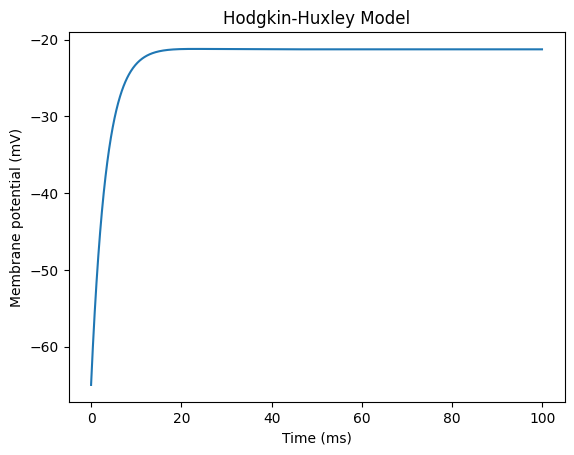

In [14]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import odeint

    # Model parameters
    Cm = 1.0  # uF/cm^2 (Membrane capacitance)
    gK = 36.0 # mS/cm^2 (Potassium conductance)
    gNa = 120.0 # mS/cm^2 (Sodium conductance)
    gL = 0.3 # mS/cm^2 (Leak conductance)
    VK = -77.0 # mV (Potassium reversal potential)
    VNa = 50.0 # mV (Sodium reversal potential)
    VL = -54.3 # mV (Leak reversal potential)

    # Activation and inactivation rates
    def alpha_n(V):
        return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)

    def beta_n(V):
        return 0.125 * np.exp(-V / 80)

    def alpha_m(V):
        return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)

    def beta_m(V):
        return 4 * np.exp(-V / 18)

    def alpha_h(V):
        return 0.07 * np.exp(-V / 20)

    def beta_h(V):
        return 1 / (np.exp((30 - V) / 10) + 1)

    # Hodgkin-Huxley differential equations
    def hodgkin_huxley(y, t, I):
        V, n, m, h = y
        dn_dt = alpha_n(V) * (1 - n) - beta_n(V) * n
        dm_dt = alpha_m(V) * (1 - m) - beta_m(V) * m
        dh_dt = alpha_h(V) * (1 - h) - beta_h(V) * h
        dV_dt = (I - gK * n**4 * (V - VK) - gNa * m**3 * h * (V - VNa) - gL * (V - VL)) / Cm
        return [dV_dt, dn_dt, dm_dt, dh_dt]

    # Simulation time
    t = np.arange(0, 100, 0.1) # ms

    # Applied current
    I = 10.0 # uA/cm^2

    # Initial conditions
    y0 = [-65.0, 0.05, 0.05, 0.6] # [V, n, m, h]

    # Solve the ODEs
    sol = odeint(hodgkin_huxley, y0, t, args=(I,))

    # Plot the membrane potential
    plt.plot(t, sol[:, 0])
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane potential (mV)')
    plt.title('Hodgkin-Huxley Model')
    plt.show()

Ecuación de Hodgkin-Huxley

El modelo de Hodgkin-Huxley es un conjunto de ecuaciones diferenciales ordinarias no lineales que describen el comportamiento eléctrico de las células excitables, como las neuronas. Fue desarrollado por Alan Hodgkin y Andrew Huxley en 1952 para explicar los mecanismos iónicos que subyacen a la iniciación y propagación de los potenciales de acción en el axón gigante del calamar.

Potencial de Membrana (V)

Es la diferencia de voltaje a través de la membrana celular.

Canales Iónicos

Son proteínas que permiten el paso selectivo de iones a través de la membrana.

El modelo considera canales de sodio (Na+), potasio (K+) y fuga (L).

Corrientes Iónicas

El flujo de iones a través de los canales genera corrientes eléctricas.

El modelo calcula las corrientes de sodio (INa), potasio (IK) y fuga (IL).

Variables de Compuerta (m, n, h)

Describen el estado de apertura de los canales iónicos.

Varían con el tiempo y el voltaje.
Ecuaciones Principales

El modelo se basa en cuatro ecuaciones diferenciales ordinarias

La ecuación del potencial de membrana describe cómo el potencial de membrana cambia con el tiempo en función de las corrientes iónicas.

Las ecuaciones de las variables de compuerta describen cómo las variables de compuerta cambian con el tiempo en función del voltaje.

Resolución del Modelo

El modelo de Hodgkin-Huxley se resuelve numéricamente utilizando métodos de integración de ecuaciones diferenciales ordinarias, como el método de Runge-Kutta. Estos métodos aproximan la solución de las ecuaciones en puntos de tiempo discretos.

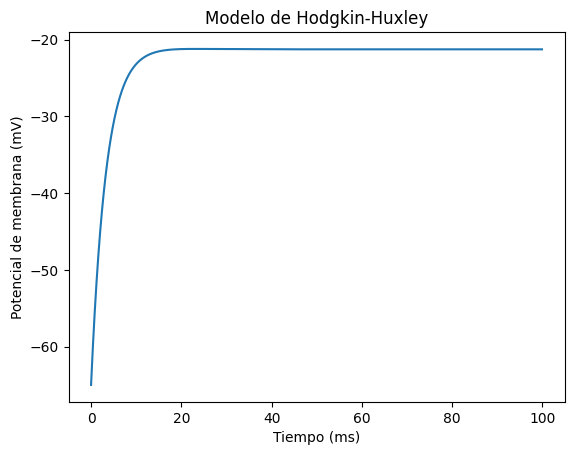

In [12]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import odeint

    # Parámetros del modelo
    Cm = 1.0  # uF/cm^2
    gK = 36.0 # mS/cm^2
    gNa = 120.0 # mS/cm^2
    gL = 0.3 # mS/cm^2
    VK = -77.0 # mV
    VNa = 50.0 # mV
    VL = -54.3 # mV

    # Tasas de activación e inactivación
    def alpha_n(V):
        return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)

    def beta_n(V):
        return 0.125 * np.exp(-V / 80)

    def alpha_m(V):
        return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)

    def beta_m(V):
        return 4 * np.exp(-V / 18)

    def alpha_h(V):
        return 0.07 * np.exp(-V / 20)

    def beta_h(V):
        return 1 / (np.exp((30 - V) / 10) + 1)

    # Ecuaciones diferenciales del modelo de Hodgkin-Huxley
    def hodgkin_huxley(y, t, I):
        V, n, m, h = y
        dn_dt = alpha_n(V) * (1 - n) - beta_n(V) * n
        dm_dt = alpha_m(V) * (1 - m) - beta_m(V) * m
        dh_dt = alpha_h(V) * (1 - h) - beta_h(V) * h
        dV_dt = (I - gK * n**4 * (V - VK) - gNa * m**3 * h * (V - VNa) - gL * (V - VL)) / Cm
        return [dV_dt, dn_dt, dm_dt, dh_dt]

    # Tiempo de simulación
    t = np.arange(0, 100, 0.1) # ms

    # Corriente aplicada
    I = 10.0 # uA/cm^2

    # Condiciones iniciales
    y0 = [-65.0, 0.05, 0.05, 0.6] # [V, n, m, h]

    # Resolver las EDO
    sol = odeint(hodgkin_huxley, y0, t, args=(I,))

    # Graficar el potencial de membrana
    plt.plot(t, sol[:, 0])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Potencial de membrana (mV)')
    plt.title('Modelo de Hodgkin-Huxley')
    plt.show()